In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


In [23]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv("fcc-forum-pageviews.csv", index_col='date', parse_dates=['date'])
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [25]:
# Clean data
hi = df['value'].quantile(0.025)
lo = df['value'].quantile(0.975)
df = df.loc[(df['value'] >= hi) & (df['value'] <= lo)]

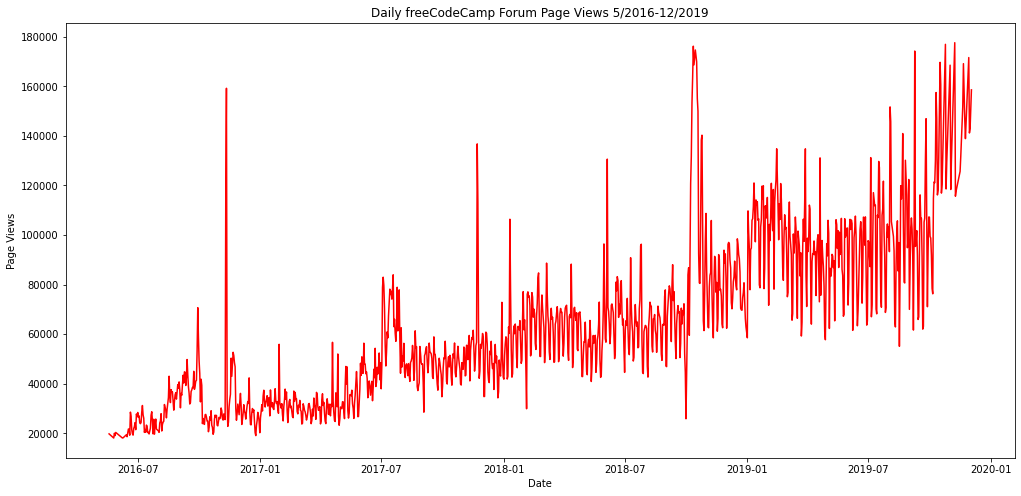

In [40]:
# Draw line plot
fig, ax = plt.subplots(figsize=(17, 8))
ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')
ax.plot(df, color='red')

In [72]:
# Copy and modify data for monthly bar plot
df_bar = df.groupby([df.index.year, df.index.month]).mean()

Text(0, 0.5, 'Average Page Views')

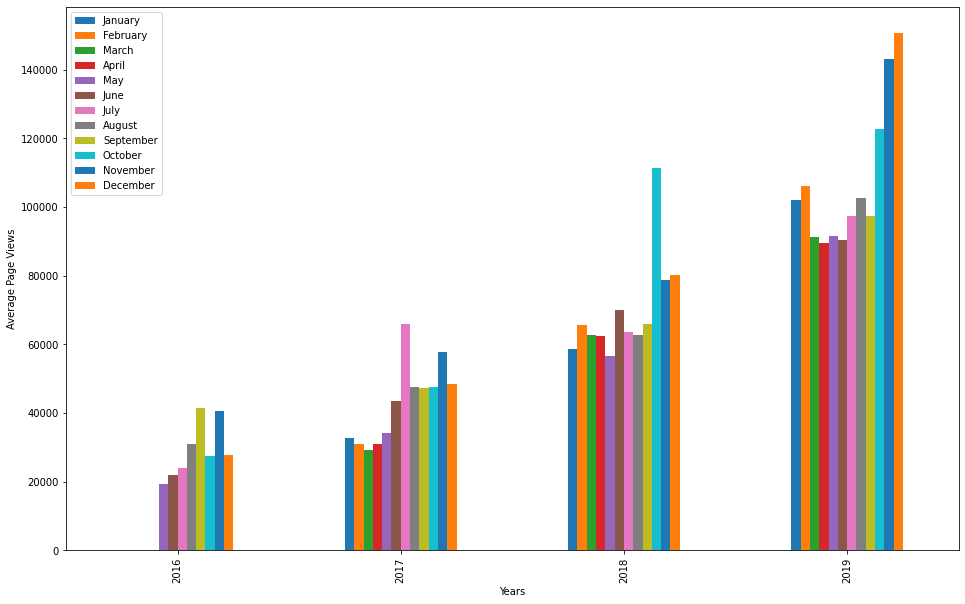

In [84]:
legends = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
               'September', 'October', 'November', 'December']

# Draw bar plot
fig= df_bar.unstack().plot(kind='bar', figsize = (16, 10)).figure
plt.legend(legends)
plt.xlabel('Years')
plt.ylabel('Average Page Views')

In [89]:
# Prepare data for box plots (this part is done!)
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box.head()

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May


<AxesSubplot:xlabel='year', ylabel='value'>

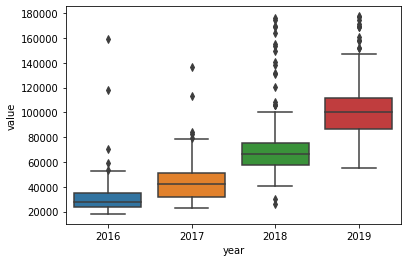

In [97]:
# Draw box plots (using Seaborn)
sns.boxplot(x=df_box.year, y=df_box.value, data=df_box)

Text(0, 0.5, 'Page Views')

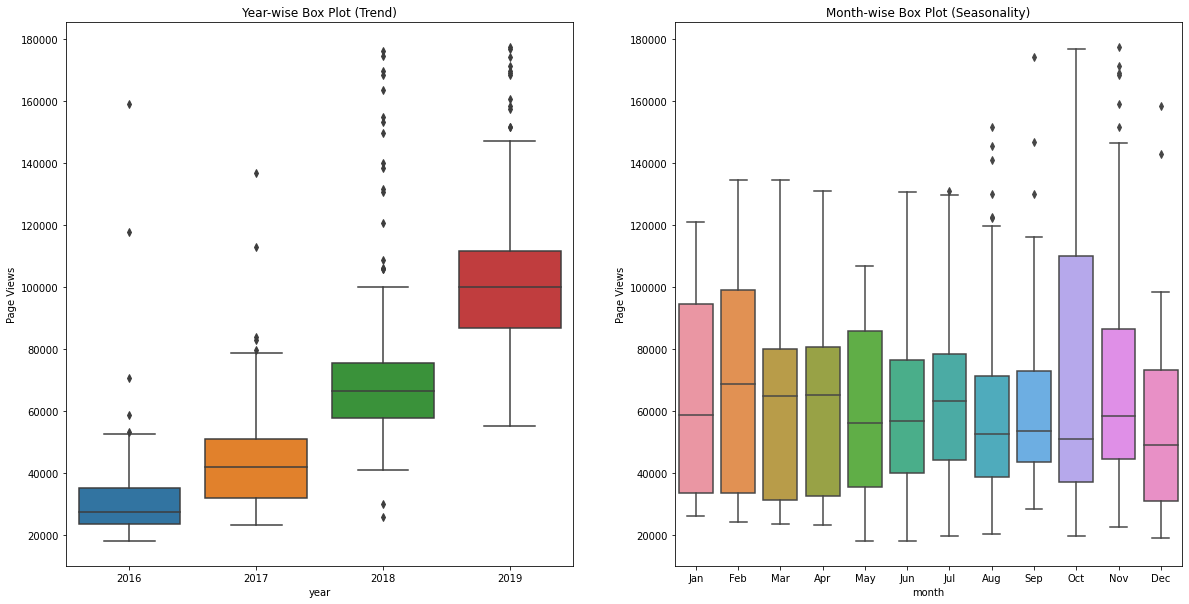

In [112]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(20)
fig.set_figheight(10)
ax1.set_title('Year-wise Box Plot (Trend)')
ax2.set_title('Month-wise Box Plot (Seasonality)')
ax1 = sns.boxplot(x=df_box.year, y=df_box.value, data=df_box, ax=ax1)
ax1.set_ylabel('Page Views')
ax2 = sns.boxplot(x=df_box.month, y=df_box.value, data=df_box, ax=ax2, order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax2.set_ylabel('Page Views')